In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
!python --version

Python 3.10.9


In [27]:
df = pd.read_csv("ovary.csv")
print(df.head())



   SUBJECT_ID    CA125  CA19-9     HE4  STATUS
0           1    15.36   36.48     NaN  cancer
1           2  2444.00   19.98  934.10  cancer
2           3    56.08   12.18   47.56  cancer
3           4  2555.00   18.41  853.50  cancer
4           5  1391.00   11.15  404.90  cancer


In [28]:
df = df.dropna()

In [29]:
print(df.head())

   SUBJECT_ID    CA125  CA19-9     HE4  STATUS
1           2  2444.00   19.98  934.10  cancer
2           3    56.08   12.18   47.56  cancer
3           4  2555.00   18.41  853.50  cancer
4           5  1391.00   11.15  404.90  cancer
5           6    55.97   22.57   49.95  cancer


In [30]:
sizes = df['STATUS'].value_counts(sort = 1)
print(sizes)

cancer     319
healthy    319
Name: STATUS, dtype: int64


In [31]:
df.drop(['SUBJECT_ID'], axis=1, inplace=True)


In [32]:
print(df.head())

     CA125  CA19-9     HE4  STATUS
1  2444.00   19.98  934.10  cancer
2    56.08   12.18   47.56  cancer
3  2555.00   18.41  853.50  cancer
4  1391.00   11.15  404.90  cancer
5    55.97   22.57   49.95  cancer


In [33]:
df.columns = df.columns.str.strip()

In [34]:
df['CA19-9'].str.strip()
df['CA125'].str.strip()

AttributeError: Can only use .str accessor with string values!

In [35]:
print(df.head())

     CA125  CA19-9     HE4  STATUS
1  2444.00   19.98  934.10  cancer
2    56.08   12.18   47.56  cancer
3  2555.00   18.41  853.50  cancer
4  1391.00   11.15  404.90  cancer
5    55.97   22.57   49.95  cancer


In [36]:
df.STATUS[df.STATUS == 'cancer'] = 1
df.STATUS[df.STATUS == 'healthy'] = 2
print(df.head())

     CA125  CA19-9     HE4 STATUS
1  2444.00   19.98  934.10      1
2    56.08   12.18   47.56      1
3  2555.00   18.41  853.50      1
4  1391.00   11.15  404.90      1
5    55.97   22.57   49.95      1


C:\Users\Dell\AppData\Local\Temp\ipykernel_26696\3215918525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.STATUS[df.STATUS == 'cancer'] = 1
C:\Users\Dell\AppData\Local\Temp\ipykernel_26696\3215918525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.STATUS[df.STATUS == 'healthy'] = 2


In [37]:
Y = df["STATUS"].values
Y=Y.astype('int')

In [38]:
X = df.drop(labels = ["STATUS"], axis=1) 
print(X.head())

     CA125  CA19-9     HE4
1  2444.00   19.98  934.10
2    56.08   12.18   47.56
3  2555.00   18.41  853.50
4  1391.00   11.15  404.90
5    55.97   22.57   49.95


In [39]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=20)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model = RandomForestClassifier(n_estimators = 10, random_state = 30)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=30)

In [42]:
prediction_test = model.predict(X_test)
print(y_test, prediction_test)

[1 2 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 1 1 2 2 1 1 1 2 1 2 2 1 1 1 1 2 2 1 2 2
 2 2 1 2 1 2 2 2 2 1 1 2 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1
 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 1 1 2 1 1 2 1 2 1 1 2 2 1 2 2 2 1 2 1 2 1 1
 1 1 2 2 2 2 1 1 1 2 2 2 1 2 1 1 2 2 1 1 1 2 2 1 2 1 2 2 2 1 2 2 2 1 1 1 1
 1 1 1 2 1 1 1 2 2 1 1 2] [1 1 2 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 1 2 1 1 1 2 2 1 2 2 1 1 1 1 2 2 1 2 2
 2 2 1 2 1 2 2 2 1 1 1 2 1 1 2 2 2 1 1 2 2 2 1 2 2 2 1 1 1 1 2 2 1 1 1 1 1
 1 1 1 1 2 1 1 2 2 2 1 1 1 1 2 2 2 2 1 1 2 1 2 1 1 2 2 1 2 2 2 2 2 1 2 1 1
 1 1 2 2 2 2 1 1 1 2 2 2 1 2 1 1 1 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1 1 1 1
 1 1 2 2 1 1 2 2 2 2 1 2]


In [43]:
from sklearn import metrics

print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy =  0.86875


In [44]:
importances = list(model.feature_importances_)

In [45]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)


CA125     0.392637
HE4       0.391700
CA19-9    0.215664
dtype: float64


In [46]:
def m_or_c(x,y,z):
    if(model.predict([[x,y,z]]))==1:
        print("Cancer")
    else:
        print("Healthy")
        
m_or_c(25,35,75)        

Healthy


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
import pickle
filename = 'rfmodel.sav'
#pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
def m_or_c(x,y,z):
    if(loaded_model.predict([[x,y,z]]))==1:
        print("Cancer")
    else:
        print("Healthy")
        
m_or_c(15,153,11) #x=ca125,y=ca19-9,z=he4    

Healthy


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


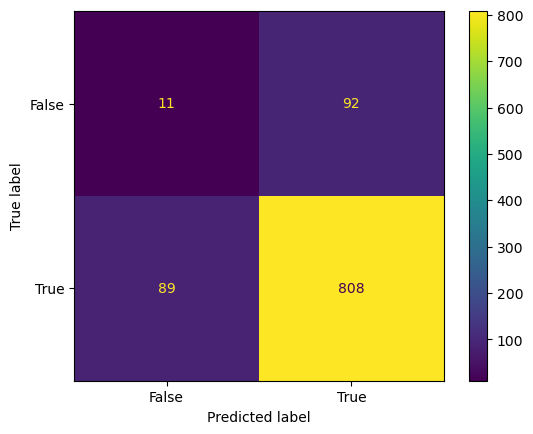

In [25]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()